# CAPSTONE: Exploratory Data Analysis 

**Author: Ishan Singh Bhullar**<br>
**Date: 11 December 2022**<br>
**Contact: ishanbhullar@gmail.com** <br>

## Table of Contents

1. [Introduction](#Introduction)<br><br>
2. [Feature Engineering](#Feature-Engineering)<br><br>
3. [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-(EDA))<br>
    - [Plotting Column Distributions](#Plotting-Column-Distributions)<br><br>
    - [Finding Relationships and Correlation between Variables](#Finding-Relationships-and-Correlation-between-Variables)<br><br>
4. [Summary of Findings](#Summary-of-Findings)<br><br>

## Introduction


In this notebook I will load the combined dataset containing track information as well as corresponding weather data extracted from ERA5 .grib files. 

There will is some data wrangling needed such as changing column names to make them easier to interporet and use. I will also be doing some feature engineering to create a target variable for modelling as well as dealing with some categorical and vector variables.

Then there is the Exploratory Data Analysis section where I will take a closer look at the distributions of the features and the possible realtionships/correlations between them. 

### Importing Relevant Libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [10]:
from datetime import datetime
from tqdm import tqdm
import time
import warnings
warnings.filterwarnings("ignore")

### Custom Functions

In [11]:
def dist_plot(df, col, plot, bins=25):
    '''
    Function to plot distribution of a column from dataframe
    
    Parameters
    -----
    df: pandas dataframe.
    col: names of columns passed as a 'string', no default value.
    plot: 'hist'or 'bar'. Type of distribution plot passed as 'string', default value is 'hist' or histogram.
    bins: number of bins for histogram plot, default value of 25.
    
    Returns
    -----
    No values returned.
    
    Output
    -----
    Appropriate distribution plot based on parameters received.
    Outputs error if right plot not received. 
    Outputs error if column name not present in dataframe
    '''
    # check if dataframe passed in a pandas dataframe
    assert isinstance(df, pd.DataFrame), 'Please enter a Pandas DataFrame!!'
    # check if column present in storm_df
    assert col in df.columns, 'Column not present in DataFrame!!'
        
    # check if valid plot value received
    assert plot in ['hist', 'bar'], 'Please enter a valid Plot Type!!'
            
    
    # plot distribution based on plot value
    if plot == 'hist':
        plt.figure()
        plt.hist(df[col], bins=bins, alpha=0.5)
        plt.title('Distribution for '+col)
        plt.xlabel(col+' in bins')
        plt.ylabel('Count')
        plt.axvline(df[col].mean(), linestyle=':', color='r', label='Mean')
        plt.axvline(df[col].median(), linestyle='-', color='r', label='Median')
        plt.legend()
        sns.despine()
        plt.show()
    else:
        plt.figure()
        df[col].value_counts().plot(kind='bar', alpha=0.5, colormap='plasma')
        plt.title('Distribution for '+col)
        sns.despine()
        plt.show()
      

### Reading and Wrangling Data

In [12]:
# read from csv
storm_df = pd.read_csv("data/final_data.csv", index_col=0)

Range of checks to ensure data loaded in properly. 

In [13]:
storm_df.head()

sid  season  number    name             iso_time      lat  \
0  1959148N23274    1959      34  ARLENE  1959-06-01 00:00:00  32.1000   
1  1959148N23274    1959      34  ARLENE  1959-06-01 03:00:00  32.2799   
2  1959148N23274    1959      34  ARLENE  1959-06-01 06:00:00  32.4000   
3  1959148N23274    1959      34  ARLENE  1959-06-01 09:00:00  32.5150   
4  1959148N23274    1959      34  ARLENE  1959-06-01 12:00:00  32.6000   

       lon  dist2land usa_status  usa_wind  ...  storm_dir    geo_250  \
0 -90.5000          0         TD      25.0  ...         42  106941.04   
1 -90.2298          0         TD      25.0  ...         59  106903.90   
2 -89.9000          0         TD      25.0  ...         69  106783.48   
3 -89.5150          0         TD      25.0  ...         74  106455.28   
4 -89.1000          0         TD      25.0  ...         78  106473.04   

   u_wind_250  v_wind_250    geo_550  u_wind_550  v_wind_550    geo_850  \
0    9.345726    1.314173  49941.254    1.885500    0.103929  14684.576   
1    9.797820    3.676654  49987.504    2.200415   -1.907968  14733.608   
2   10.698173    7.318680  49970.445    0.941431   -2.847706  14732.032   
3   14.590856   11.222942  49834.910   -0.539520   -1.913183  14646.824   
4   14.877510   10.828848  49830.684    2.249538    1.893531  14696.572   

   u_wind_850  v_wind_850  
0    1.299480    2.507897  
1    0.864694    2.880090  
2    2.117519    3.888728  
3    3.203289    2.605515  
4    2.416132    0.628975  

[5 rows x 23 columns]

In [14]:
# Check shape of dataset
print(f'Dataset has {storm_df.shape[0]} rows and {storm_df.shape[1]} columns!')

Dataset has 28800 rows and 23 columns!


In [15]:
storm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28800 entries, 0 to 28799
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sid          28800 non-null  object 
 1   season       28800 non-null  int64  
 2   number       28800 non-null  int64  
 3   name         28800 non-null  object 
 4   iso_time     28800 non-null  object 
 5   lat          28800 non-null  float64
 6   lon          28800 non-null  float64
 7   dist2land    28800 non-null  int64  
 8   usa_status   28800 non-null  object 
 9   usa_wind     28800 non-null  float64
 10  usa_pres     28800 non-null  float64
 11  usa_sshs     28800 non-null  int64  
 12  storm_speed  28800 non-null  int64  
 13  storm_dir    28800 non-null  int64  
 14  geo_250      28800 non-null  float64
 15  u_wind_250   28800 non-null  float64
 16  v_wind_250   28800 non-null  float64
 17  geo_550      28800 non-null  float64
 18  u_wind_550   28800 non-null  float64
 19  v_wi

We can drop the `usa_status` and `number` columns as they were only useful for cleaning the data.

In [16]:
storm_df.drop(columns=['usa_status', 'number'], inplace=True)

In [17]:
storm_df.info() # sanity check

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28800 entries, 0 to 28799
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sid          28800 non-null  object 
 1   season       28800 non-null  int64  
 2   name         28800 non-null  object 
 3   iso_time     28800 non-null  object 
 4   lat          28800 non-null  float64
 5   lon          28800 non-null  float64
 6   dist2land    28800 non-null  int64  
 7   usa_wind     28800 non-null  float64
 8   usa_pres     28800 non-null  float64
 9   usa_sshs     28800 non-null  int64  
 10  storm_speed  28800 non-null  int64  
 11  storm_dir    28800 non-null  int64  
 12  geo_250      28800 non-null  float64
 13  u_wind_250   28800 non-null  float64
 14  v_wind_250   28800 non-null  float64
 15  geo_550      28800 non-null  float64
 16  u_wind_550   28800 non-null  float64
 17  v_wind_550   28800 non-null  float64
 18  geo_850      28800 non-null  float64
 19  u_wi

Let's rename the following columns to make them more interpretable and easier to work with.
1. `iso_time` to `time`
2. `usa_wind` to `wind_surface`
3. `usa_pres` to `pressure_surface`
4. `usa_sshs` to `category`

In [18]:
# mapper dictionary with old names as keys
column_mapper = {'iso_time': 'time', 'usa_wind': 'wind_surface', 'usa_pres': 'pressure_surface', 'usa_sshs': 'category'}
storm_df.rename(columns = column_mapper, inplace=True)
storm_df.head()

sid  season    name                 time      lat      lon  \
0  1959148N23274    1959  ARLENE  1959-06-01 00:00:00  32.1000 -90.5000   
1  1959148N23274    1959  ARLENE  1959-06-01 03:00:00  32.2799 -90.2298   
2  1959148N23274    1959  ARLENE  1959-06-01 06:00:00  32.4000 -89.9000   
3  1959148N23274    1959  ARLENE  1959-06-01 09:00:00  32.5150 -89.5150   
4  1959148N23274    1959  ARLENE  1959-06-01 12:00:00  32.6000 -89.1000   

   dist2land  wind_surface  pressure_surface  category  ...  storm_dir  \
0          0          25.0            1008.0        -1  ...         42   
1          0          25.0            1008.0        -1  ...         59   
2          0          25.0            1008.0        -1  ...         69   
3          0          25.0            1008.0        -1  ...         74   
4          0          25.0            1008.0        -1  ...         78   

     geo_250  u_wind_250  v_wind_250    geo_550  u_wind_550  v_wind_550  \
0  106941.04    9.345726    1.314173  49941.254    1.885500    0.103929   
1  106903.90    9.797820    3.676654  49987.504    2.200415   -1.907968   
2  106783.48   10.698173    7.318680  49970.445    0.941431   -2.847706   
3  106455.28   14.590856   11.222942  49834.910   -0.539520   -1.913183   
4  106473.04   14.877510   10.828848  49830.684    2.249538    1.893531   

     geo_850  u_wind_850  v_wind_850  
0  14684.576    1.299480    2.507897  
1  14733.608    0.864694    2.880090  
2  14732.032    2.117519    3.888728  
3  14646.824    3.203289    2.605515  
4  14696.572    2.416132    0.628975  

[5 rows x 21 columns]

In [19]:
storm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28800 entries, 0 to 28799
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sid               28800 non-null  object 
 1   season            28800 non-null  int64  
 2   name              28800 non-null  object 
 3   time              28800 non-null  object 
 4   lat               28800 non-null  float64
 5   lon               28800 non-null  float64
 6   dist2land         28800 non-null  int64  
 7   wind_surface      28800 non-null  float64
 8   pressure_surface  28800 non-null  float64
 9   category          28800 non-null  int64  
 10  storm_speed       28800 non-null  int64  
 11  storm_dir         28800 non-null  int64  
 12  geo_250           28800 non-null  float64
 13  u_wind_250        28800 non-null  float64
 14  v_wind_250        28800 non-null  float64
 15  geo_550           28800 non-null  float64
 16  u_wind_550        28800 non-null  float6

We need to change the dtype of the `time` column to *datetime* format.

In [20]:
storm_df['time'] = pd.to_datetime(storm_df['time'])
storm_df.head()

sid  season    name                time      lat      lon  \
0  1959148N23274    1959  ARLENE 1959-06-01 00:00:00  32.1000 -90.5000   
1  1959148N23274    1959  ARLENE 1959-06-01 03:00:00  32.2799 -90.2298   
2  1959148N23274    1959  ARLENE 1959-06-01 06:00:00  32.4000 -89.9000   
3  1959148N23274    1959  ARLENE 1959-06-01 09:00:00  32.5150 -89.5150   
4  1959148N23274    1959  ARLENE 1959-06-01 12:00:00  32.6000 -89.1000   

   dist2land  wind_surface  pressure_surface  category  ...  storm_dir  \
0          0          25.0            1008.0        -1  ...         42   
1          0          25.0            1008.0        -1  ...         59   
2          0          25.0            1008.0        -1  ...         69   
3          0          25.0            1008.0        -1  ...         74   
4          0          25.0            1008.0        -1  ...         78   

     geo_250  u_wind_250  v_wind_250    geo_550  u_wind_550  v_wind_550  \
0  106941.04    9.345726    1.314173  49941.254    1.885500    0.103929   
1  106903.90    9.797820    3.676654  49987.504    2.200415   -1.907968   
2  106783.48   10.698173    7.318680  49970.445    0.941431   -2.847706   
3  106455.28   14.590856   11.222942  49834.910   -0.539520   -1.913183   
4  106473.04   14.877510   10.828848  49830.684    2.249538    1.893531   

     geo_850  u_wind_850  v_wind_850  
0  14684.576    1.299480    2.507897  
1  14733.608    0.864694    2.880090  
2  14732.032    2.117519    3.888728  
3  14646.824    3.203289    2.605515  
4  14696.572    2.416132    0.628975  

[5 rows x 21 columns]

In [21]:
storm_df.info() # sanity check

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28800 entries, 0 to 28799
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   sid               28800 non-null  object        
 1   season            28800 non-null  int64         
 2   name              28800 non-null  object        
 3   time              28800 non-null  datetime64[ns]
 4   lat               28800 non-null  float64       
 5   lon               28800 non-null  float64       
 6   dist2land         28800 non-null  int64         
 7   wind_surface      28800 non-null  float64       
 8   pressure_surface  28800 non-null  float64       
 9   category          28800 non-null  int64         
 10  storm_speed       28800 non-null  int64         
 11  storm_dir         28800 non-null  int64         
 12  geo_250           28800 non-null  float64       
 13  u_wind_250        28800 non-null  float64       
 14  v_wind_250        2880

## Feature Engineering

### `category` column

Let's take a close look at the `category` column. The ratings are based on the Saffir-Simpson Hurricane Scale. Refer to [IBTrACS column documentation](https://www.ncei.noaa.gov/sites/default/files/2021-07/IBTrACS_v04_column_documentation.pdf) for more information. 

In [22]:
# unique values in column
storm_df['category'].value_counts()

-1    10860
 0     8982
 1     4068
 2     1569
-2     1104
 3      823
 4      507
-3      399
-5      384
 5      104
Name: category, dtype: int64

In [23]:
# exploring category value -3 closer
storm_df[storm_df['category']==-3][['wind_surface']].value_counts()

wind_surface
25.0            133
20.0             89
15.0             57
30.0             51
10.0             24
35.0             12
22.0             10
27.0              9
40.0              7
32.0              3
17.0              2
12.0              1
37.0              1
dtype: int64

For our purposes it will be better to convert this to a simpler scale based on wind speeds as follows:

- 'depression' - `wind_surface` <= 34 kts
- 'storm' - 34 < `wind_surface` <= 96 kt
- 'severe' - `wind_surface` > 96 kts

In [24]:
# get column index for category and wind_surface column
wind_idx = storm_df.columns.get_loc('wind_surface')
cat_idx = storm_df.columns.get_loc('category')
# loop to iterate through dataframe row by row
for row in tqdm(range(0, storm_df.shape[0])):
    
    # replace category column values based on conditions listed above
    if storm_df.iloc[row, wind_idx] <= 34:
        storm_df.iloc[row, cat_idx] = 'depression'
    elif storm_df.iloc[row, wind_idx] > 96:
        storm_df.iloc[row, cat_idx] = 'severe'
    else:
        storm_df.iloc[row, cat_idx] = 'storm'
print('Operation Completed!')
print(storm_df['category'].value_counts())

100%|██████████| 28800/28800 [00:02<00:00, 12426.92it/s]

Operation Completed!
storm         15346
depression    12020
severe         1434
Name: category, dtype: int64


### Introducing Lag in Surface Wind Field to Find an Intensity Delta

In order to eventually conduct Time-Series analysis, I will introduce a 2-step (6 hour) lag to the `wind_surface` column. This lagged wind column, `wind_lag` will be my target variable for future regression modelling. For now I will use this column to add another column, `intensity_delta`. This will be a binary column, that indicates whether the surface wind increased or not over the 6-hour window. A value of '1' denotes an increase and a value of '0' denotes no-increase i.e. either no change or a decrease.

In [25]:
# add nan column to dataframe
storm_df['wind_lag'] = np.nan
storm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28800 entries, 0 to 28799
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   sid               28800 non-null  object        
 1   season            28800 non-null  int64         
 2   name              28800 non-null  object        
 3   time              28800 non-null  datetime64[ns]
 4   lat               28800 non-null  float64       
 5   lon               28800 non-null  float64       
 6   dist2land         28800 non-null  int64         
 7   wind_surface      28800 non-null  float64       
 8   pressure_surface  28800 non-null  float64       
 9   category          28800 non-null  object        
 10  storm_speed       28800 non-null  int64         
 11  storm_dir         28800 non-null  int64         
 12  geo_250           28800 non-null  float64       
 13  u_wind_250        28800 non-null  float64       
 14  v_wind_250        2880

In [26]:
sid_idx = storm_df.columns.get_loc('sid')
wind_idx = storm_df.columns.get_loc('wind_surface')
lag_idx = storm_df.columns.get_loc('wind_lag')

# loop through dataframe row by row
for row in tqdm(range(0, (storm_df.shape[0]-2))):
    
    # check if next row belongs to the same storm
    if (storm_df.iloc[row, sid_idx] == storm_df.iloc[row+2, sid_idx]):
        
        # introduce 1-step lag to surface wind and store in new column
        storm_df.iloc[row, lag_idx] = storm_df.iloc[row+2, wind_idx]
    else:
        storm_df.iloc[row, lag_idx] = np.nan
print('Operation Complete!')

100%|██████████| 28798/28798 [00:03<00:00, 8827.06it/s]

Operation Complete!


In [27]:
# sanity check
storm_df[['sid', 'wind_surface', 'wind_lag']].head(50)

sid  wind_surface  wind_lag
0   1959148N23274          25.0      25.0
1   1959148N23274          25.0      25.0
2   1959148N23274          25.0      25.0
3   1959148N23274          25.0      25.0
4   1959148N23274          25.0      25.0
5   1959148N23274          25.0      22.0
6   1959148N23274          25.0      20.0
7   1959148N23274          22.0      20.0
8   1959148N23274          20.0      20.0
9   1959148N23274          20.0      20.0
10  1959148N23274          20.0      20.0
11  1959148N23274          20.0      20.0
12  1959148N23274          20.0      20.0
13  1959148N23274          20.0       NaN
14  1959148N23274          20.0       NaN
15  1959167N21265          35.0      40.0
16  1959167N21265          37.0      45.0
17  1959167N21265          40.0      50.0
18  1959167N21265          45.0      52.0
19  1959167N21265          50.0      55.0
20  1959167N21265          52.0      57.0
21  1959167N21265          55.0      60.0
22  1959167N21265          57.0      60.0
23  1959167N21265          60.0      60.0
24  1959167N21265          60.0      60.0
25  1959167N21265          60.0      60.0
26  1959167N21265          60.0      55.0
27  1959167N21265          60.0      50.0
28  1959167N21265          55.0      50.0
29  1959167N21265          50.0      50.0
30  1959167N21265          50.0      47.0
31  1959167N21265          50.0      45.0
32  1959167N21265          47.0      42.0
33  1959167N21265          45.0      40.0
34  1959167N21265          42.0      37.0
35  1959167N21265          40.0      35.0
36  1959167N21265          37.0      35.0
37  1959167N21265          35.0      35.0
38  1959167N21265          35.0      32.0
39  1959167N21265          35.0      30.0
40  1959167N21265          32.0      27.0
41  1959167N21265          30.0      25.0
42  1959167N21265          27.0       NaN
43  1959167N21265          25.0       NaN
44  1959169N26274          35.0      40.0
45  1959169N26274          37.0      40.0
46  1959169N26274          40.0      40.0
47  1959169N26274          40.0      42.0
48  1959169N26274          40.0      45.0
49  1959169N26274          42.0      50.0

`wind_lag` column created successfully . As expected, a number of NaNs have been introduced. Let's see exactly how many. 

In [28]:
storm_df.isnull().sum() # checking number of null values after introducing lag

sid                    0
season                 0
name                   0
time                   0
lat                    0
lon                    0
dist2land              0
wind_surface           0
pressure_surface       0
category               0
storm_speed            0
storm_dir              0
geo_250                0
u_wind_250             0
v_wind_250             0
geo_550                0
u_wind_550             0
v_wind_550             0
geo_850                0
u_wind_850             0
v_wind_850             0
wind_lag            1269
dtype: int64

The `wind_lag` column has 1269 NaN values. For our analysis we have to drop these rows as we cannot have NaNs in our target variable. 

In [29]:
# dropping rows with null values in `wind_lag` column
storm_df.dropna(inplace=True)

In [30]:
# sanity check 
storm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27531 entries, 0 to 28797
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   sid               27531 non-null  object        
 1   season            27531 non-null  int64         
 2   name              27531 non-null  object        
 3   time              27531 non-null  datetime64[ns]
 4   lat               27531 non-null  float64       
 5   lon               27531 non-null  float64       
 6   dist2land         27531 non-null  int64         
 7   wind_surface      27531 non-null  float64       
 8   pressure_surface  27531 non-null  float64       
 9   category          27531 non-null  object        
 10  storm_speed       27531 non-null  int64         
 11  storm_dir         27531 non-null  int64         
 12  geo_250           27531 non-null  float64       
 13  u_wind_250        27531 non-null  float64       
 14  v_wind_250        2753

In [31]:
print(f'We are left with {storm_df.shape[0]} rows and {storm_df.shape[1]} columns.')

We are left with 27531 rows and 22 columns.


In [32]:
storm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27531 entries, 0 to 28797
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   sid               27531 non-null  object        
 1   season            27531 non-null  int64         
 2   name              27531 non-null  object        
 3   time              27531 non-null  datetime64[ns]
 4   lat               27531 non-null  float64       
 5   lon               27531 non-null  float64       
 6   dist2land         27531 non-null  int64         
 7   wind_surface      27531 non-null  float64       
 8   pressure_surface  27531 non-null  float64       
 9   category          27531 non-null  object        
 10  storm_speed       27531 non-null  int64         
 11  storm_dir         27531 non-null  int64         
 12  geo_250           27531 non-null  float64       
 13  u_wind_250        27531 non-null  float64       
 14  v_wind_250        2753

Now to add the `intensity_delta` column.

In [33]:
# create new column with NaNs
storm_df['intensity_delta'] = np.nan
storm_df.columns

Index(['sid', 'season', 'name', 'time', 'lat', 'lon', 'dist2land',
       'wind_surface', 'pressure_surface', 'category', 'storm_speed',
       'storm_dir', 'geo_250', 'u_wind_250', 'v_wind_250', 'geo_550',
       'u_wind_550', 'v_wind_550', 'geo_850', 'u_wind_850', 'v_wind_850',
       'wind_lag', 'intensity_delta'],
      dtype='object')

In [34]:
intensity_idx = storm_df.columns.get_loc('intensity_delta')
lag_idx = storm_df.columns.get_loc('wind_lag')
wind_idx = storm_df.columns.get_loc('wind_surface')

# loop through dataframe row by row
for row in tqdm(range(0, (storm_df.shape[0]))):
    
    # check if wind_lag is greater than wind_surface
    if (storm_df.iloc[row, lag_idx] > storm_df.iloc[row, wind_idx]):
        storm_df.iloc[row, intensity_idx] = 1
    else:
        storm_df.iloc[row, intensity_idx] = 0
print('Operation Complete!')

100%|██████████| 27531/27531 [00:02<00:00, 10566.17it/s]

Operation Complete!


In [35]:
# sanity check plus distribution check
storm_df['intensity_delta'].value_counts(normalize=True)

0.0    0.690313
1.0    0.309687
Name: intensity_delta, dtype: float64

`intensity_delta` created successfully. Plus, we can see that ~31% of the sets of conditions (rows) lead to an increase in surface winds.

### Separating Direction and Speed for u and v Wind

u-wind denotes the eastward component of horizontal wind and v-wind represents the northward component of horizontal wind. Negative sign indicates westward wind for u-wind and southward wind for v-wind. Let's separate the directional component from both these variables (at the three pressure levels) and create new binary columns to store it. This should give us a better idea of the effect of magnitude and direction of horizontal wind on our target variable, `intensity_delta`.

In [36]:
# new direction columns for u and v wind at different pressure levels
pressure_levels = [250, 550, 850] # list of pressure levels

for pressure in tqdm(pressure_levels):
    
    storm_df['u_dir_'+str(pressure)] = np.where(storm_df['u_wind_'+str(pressure)]>0, 1, 0)
    storm_df['v_dir_'+str(pressure)] = np.where(storm_df['v_wind_'+str(pressure)]>0, 1, 0)
    
storm_df.info()
    

100%|██████████| 3/3 [00:00<00:00, 749.96it/s]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27531 entries, 0 to 28797
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   sid               27531 non-null  object        
 1   season            27531 non-null  int64         
 2   name              27531 non-null  object        
 3   time              27531 non-null  datetime64[ns]
 4   lat               27531 non-null  float64       
 5   lon               27531 non-null  float64       
 6   dist2land         27531 non-null  int64         
 7   wind_surface      27531 non-null  float64       
 8   pressure_surface  27531 non-null  float64       
 9   category          27531 non-null  object        
 10  storm_speed       27531 non-null  int64         
 11  storm_dir         27531 non-null  int64         
 12  geo_250           27531 non-null  float64       
 13  u_wind_250        27531 non-null  float64       
 14  v_wind_250        2753

In [37]:
# sanity check
storm_df['u_dir_250'].value_counts()

1    15581
0    11950
Name: u_dir_250, dtype: int64

Direction columns created successfully. Now I will rearrange the column to make the dataframe easier to read.

In [38]:
storm_df.columns

Index(['sid', 'season', 'name', 'time', 'lat', 'lon', 'dist2land',
       'wind_surface', 'pressure_surface', 'category', 'storm_speed',
       'storm_dir', 'geo_250', 'u_wind_250', 'v_wind_250', 'geo_550',
       'u_wind_550', 'v_wind_550', 'geo_850', 'u_wind_850', 'v_wind_850',
       'wind_lag', 'intensity_delta', 'u_dir_250', 'v_dir_250', 'u_dir_550',
       'v_dir_550', 'u_dir_850', 'v_dir_850'],
      dtype='object')

In [39]:
# reordering columns
storm_df = storm_df[['sid', 'season', 'name', 'time', 'lat', 'lon', 'dist2land','wind_surface', 
                     'pressure_surface', 'category', 'storm_speed', 'storm_dir', 
                     'geo_250', 'u_wind_250', 'u_dir_250', 'v_wind_250', 'v_dir_250', 
                     'geo_550', 'u_wind_550', 'u_dir_550', 'v_wind_550', 'v_dir_550',
                     'geo_850', 'u_wind_850', 'u_dir_850', 'v_wind_850', 'v_dir_850', 'wind_lag', 'intensity_delta']]

In [40]:
# sanity check
storm_df.shape

(27531, 29)

Now to remove the negative signs from u-wind and v-wind columns to make them scalar.

In [41]:
# changing u_wind_ and v_wind_ columns to abs
# loop through pressure levels
for pressure in pressure_levels:
    storm_df['u_wind_'+str(pressure)] = abs(storm_df['u_wind_'+str(pressure)])
    storm_df['v_wind_'+str(pressure)] = abs(storm_df['v_wind_'+str(pressure)])

In [42]:
# sanity check
storm_df[storm_df['u_wind_250']>0].shape[0] == storm_df.shape[0]

True

In [43]:
storm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27531 entries, 0 to 28797
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   sid               27531 non-null  object        
 1   season            27531 non-null  int64         
 2   name              27531 non-null  object        
 3   time              27531 non-null  datetime64[ns]
 4   lat               27531 non-null  float64       
 5   lon               27531 non-null  float64       
 6   dist2land         27531 non-null  int64         
 7   wind_surface      27531 non-null  float64       
 8   pressure_surface  27531 non-null  float64       
 9   category          27531 non-null  object        
 10  storm_speed       27531 non-null  int64         
 11  storm_dir         27531 non-null  int64         
 12  geo_250           27531 non-null  float64       
 13  u_wind_250        27531 non-null  float64       
 14  u_dir_250         2753

That concludes our feature engineering. We can finally move on to some EDA.

## Exploratory Data Analysis (EDA)

The `sid`, `season` and `name` columns are useful for EDA. I will drop them and work with a new dataframe called eda_df.

In [44]:
eda_df = storm_df.drop(columns=['sid', 'season', 'name'])

Lets describe the numerical columns.

In [45]:
eda_df.describe().T

count           mean         std            min  \
lat               27531.0      24.724146    8.527637       7.200000   
lon               27531.0     -63.733107   20.145651    -117.600000   
dist2land         27531.0     733.362827  634.972684       0.000000   
wind_surface      27531.0      47.929171   24.959175      10.000000   
pressure_surface  27531.0     996.007228   16.811460     888.000000   
storm_speed       27531.0      11.083179    6.280070       0.000000   
storm_dir         27531.0     203.163779  122.927232       0.000000   
geo_250           27531.0  106926.557254  805.297849  100570.140000   
u_wind_250        27531.0       6.006307    5.116489       0.000089   
u_dir_250         27531.0       0.565944    0.495641       0.000000   
v_wind_250        27531.0       5.138421    4.757879       0.000689   
v_dir_250         27531.0       0.719298    0.449350       0.000000   
geo_550           27531.0   49832.472676  518.000960   45566.387000   
u_wind_550        27531.0       4.512597    3.585714       0.000168   
u_dir_550         27531.0       0.433075    0.495510       0.000000   
v_wind_550        27531.0       3.180817    3.004103       0.000005   
v_dir_550         27531.0       0.665722    0.471746       0.000000   
geo_850           27531.0   14620.386186  487.218214   10520.254000   
u_wind_850        27531.0       4.109836    3.164245       0.000176   
u_dir_850         27531.0       0.310341    0.462642       0.000000   
v_wind_850        27531.0       3.410013    2.968663       0.000081   
v_dir_850         27531.0       0.745669    0.435493       0.000000   
wind_lag          27531.0      48.328176   24.903357      10.000000   
intensity_delta   27531.0       0.309687    0.462373       0.000000   

                            25%            50%            75%            max  
lat                   17.300000      24.700000      31.346100      58.356300  
lon                  -79.992800     -64.347200     -48.679850      -6.798570  
dist2land            178.000000     547.000000    1249.000000    2515.000000  
wind_surface          30.000000      40.000000      65.000000     165.000000  
pressure_surface     990.000000    1002.000000    1008.000000    1020.000000  
storm_speed            7.000000      10.000000      14.000000      60.000000  
storm_dir             61.000000     270.000000     300.000000     360.000000  
geo_250           106775.540000  107153.820000  107385.730000  108309.780000  
u_wind_250             2.237908       4.823844       8.297360      46.442330  
u_dir_250              0.000000       1.000000       1.000000       1.000000  
v_wind_250             1.721840       3.785481       7.057779      49.074550  
v_dir_250              0.000000       1.000000       1.000000       1.000000  
geo_550            49667.583500   49965.370000   50151.770000   50921.664000  
u_wind_550             1.761540       3.751787       6.375080      31.485062  
u_dir_550              0.000000       0.000000       1.000000       1.000000  
v_wind_550             1.075558       2.365844       4.331176      35.052414  
v_dir_550              0.000000       1.000000       1.000000       1.000000  
geo_850            14434.927500   14719.094000   14928.394500   15886.241000  
u_wind_850             1.602136       3.466542       5.934627      43.094635  
u_dir_850              0.000000       0.000000       1.000000       1.000000  
v_wind_850             1.256340       2.685853       4.738293      35.606690  
v_dir_850              0.000000       1.000000       1.000000       1.000000  
wind_lag              30.000000      40.000000      65.000000     165.000000  
intensity_delta        0.000000       0.000000       1.000000       1.000000

Most of the columns have moderate to large outliers. This is expected given the nature of weather data. We can get a better idea of the distributions by plotting them out. 

### Plotting Column Distributions

In [46]:
eda_df.columns

Index(['time', 'lat', 'lon', 'dist2land', 'wind_surface', 'pressure_surface',
       'category', 'storm_speed', 'storm_dir', 'geo_250', 'u_wind_250',
       'u_dir_250', 'v_wind_250', 'v_dir_250', 'geo_550', 'u_wind_550',
       'u_dir_550', 'v_wind_550', 'v_dir_550', 'geo_850', 'u_wind_850',
       'u_dir_850', 'v_wind_850', 'v_dir_850', 'wind_lag', 'intensity_delta'],
      dtype='object')

We can do a subplot here but histograms require different bin values sometimes to be properly interpretable. So, I will individually plot the distributions of each column and analyse it.

#### `lat` column

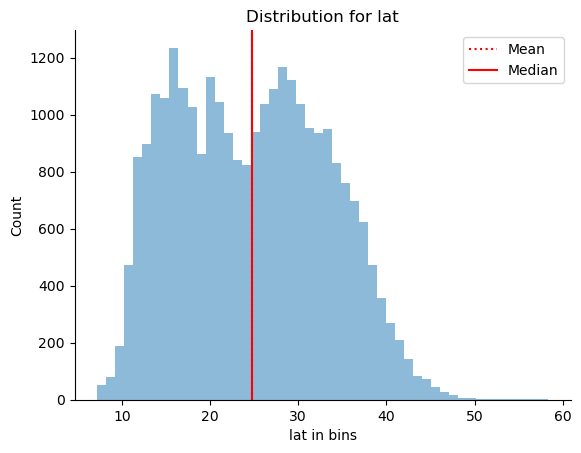

In [47]:
dist_plot(eda_df, 'lat', 'hist', 50)

It's quite interesting to see a bimodal distribution for the latitude of storms. There are two possibilities for this:
1. One set of storms start or originate closer to the equator, while another set starts further to the north.
2. It could also mark the difference between depressions which originate and run out of steam quicker, and fully formed storms that tend to have longer paths that veer north with time.

Let's test the second option.

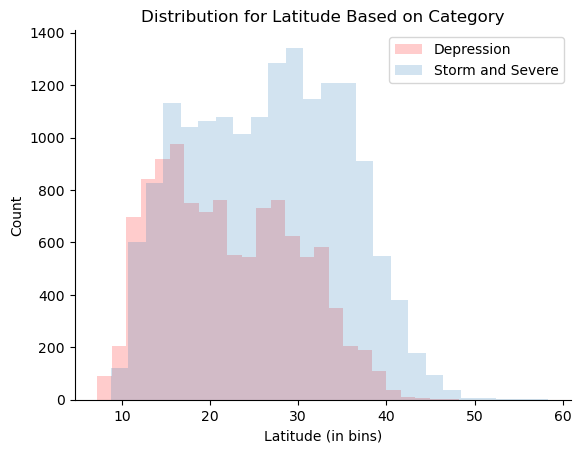

In [48]:
plt.figure()

plt.hist(eda_df[eda_df['category']=='depression']['lat'], alpha=0.2, bins=25, label='Depression', color='red')
plt.hist(eda_df[eda_df['category']!='depression']['lat'], alpha=0.2, bins=25, label='Storm and Severe')
plt.title('Distribution for Latitude Based on Category')
plt.xlabel('Latitude (in bins)')
plt.ylabel('Count')

plt.legend()
sns.despine()
plt.show()

It looks like the bimodality might be more related to the prigin of the storm than its severity. We will check this later on when we examine correlations.

#### `lon` column

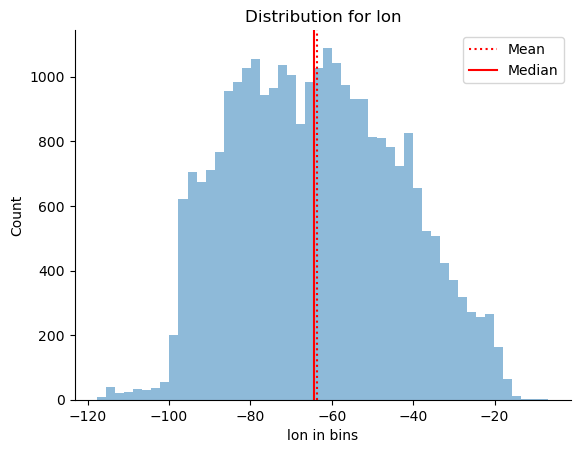

In [49]:
dist_plot(eda_df, 'lon', 'hist', 50)

The Longitudes are relatively normally distributed however, there is a hint of bimodality here. This follows conventional logic as storms tend to originate towards the eastern regions of the atlantic and move westwards. 

#### `dist2land` column

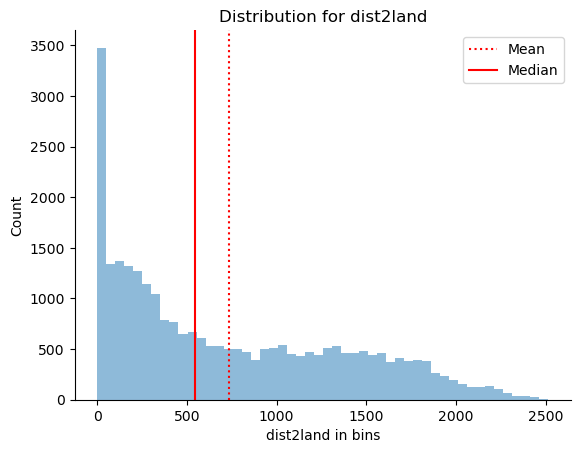

In [50]:
dist_plot(eda_df, 'dist2land', 'hist', 50)

We see a heavy right skew to the distribution. A thing to note here is that '0' represents storms that made landfall. As we can see, a very large number of storms tracked made landfall.

#### `wind_surface` column

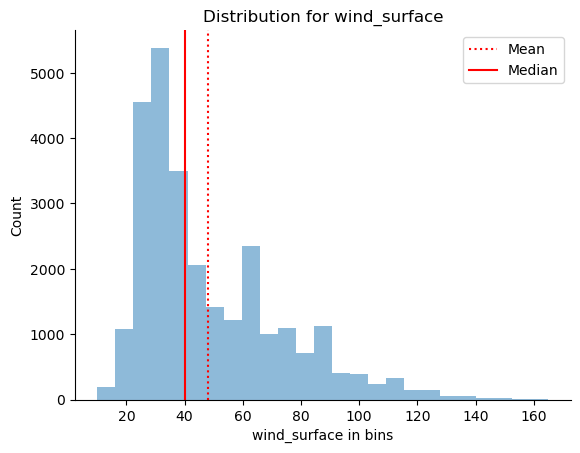

In [51]:
dist_plot(eda_df, 'wind_surface', 'hist')

There is a strong right skew to the distribution. This is to be expected as only a few storms develop to an extent where the surface wind speeds reach very high values.

#### `pressure_surface` column

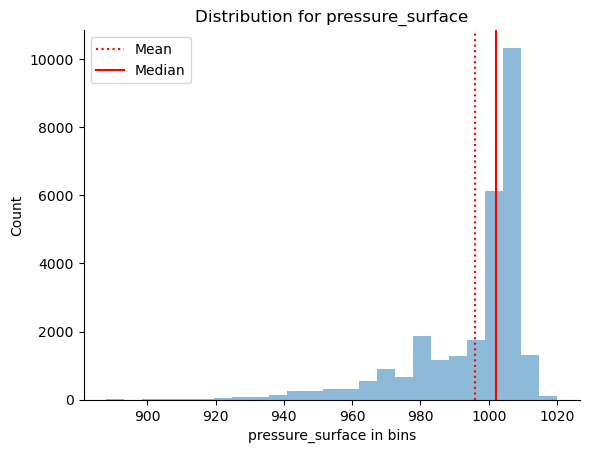

In [52]:
dist_plot(eda_df, 'pressure_surface', 'hist')

The distribution for the `pressure_surface` column is almost a mirror of the `wind_surface` column. This is again due to the fact that low pressures tend to denote more severe storms. However, it is quite interesting to note the number of pressure values above 1000hPa. This tells us that depressions can begin at relatively higher pressures.  

#### `category` column

In [53]:
eda_df['category'].value_counts(normalize=True)

storm         0.540445
depression    0.407541
severe        0.052014
Name: category, dtype: float64

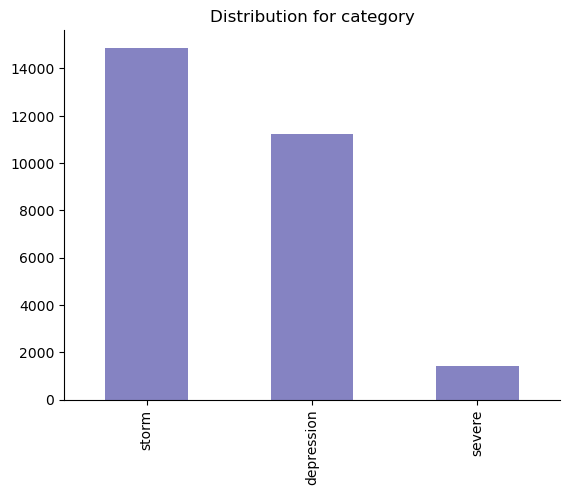

In [54]:
dist_plot(eda_df, 'category', 'bar')

As expected, only a very few storms (~5%) develop to 'severe' status. But we know that these storms inflict massive damage to life and property every year. 

#### `storm_speed` column

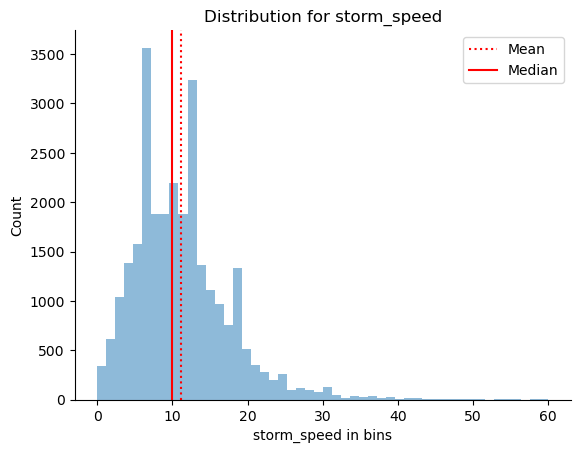

In [55]:
dist_plot(eda_df, 'storm_speed', 'hist', 50)

The distribution looks somewhat bimodal and right skewed with some extreme outliers. Later on we will test correlations and try to uncover if there is a specific reason for the outliers and bimodality. 

#### `storm_dir` column

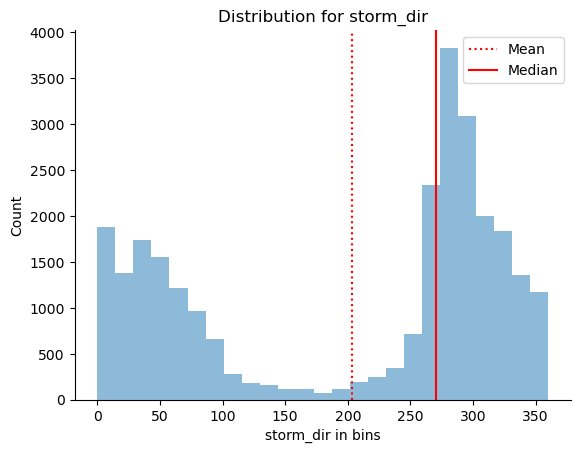

In [56]:
dist_plot(eda_df, 'storm_dir', 'hist')

*Note: 0 represents North, 90 represents East, 180 represents South, and 270 represents West.*

This distribution highlights a very interesting feature of tropical storms in the Northern Hemishpere. The majority of storms tend to move Westwards. Some storms, if they last long enough, curl north and east. 

#### `geo_250`, `geo_550`, and `geo_850` column

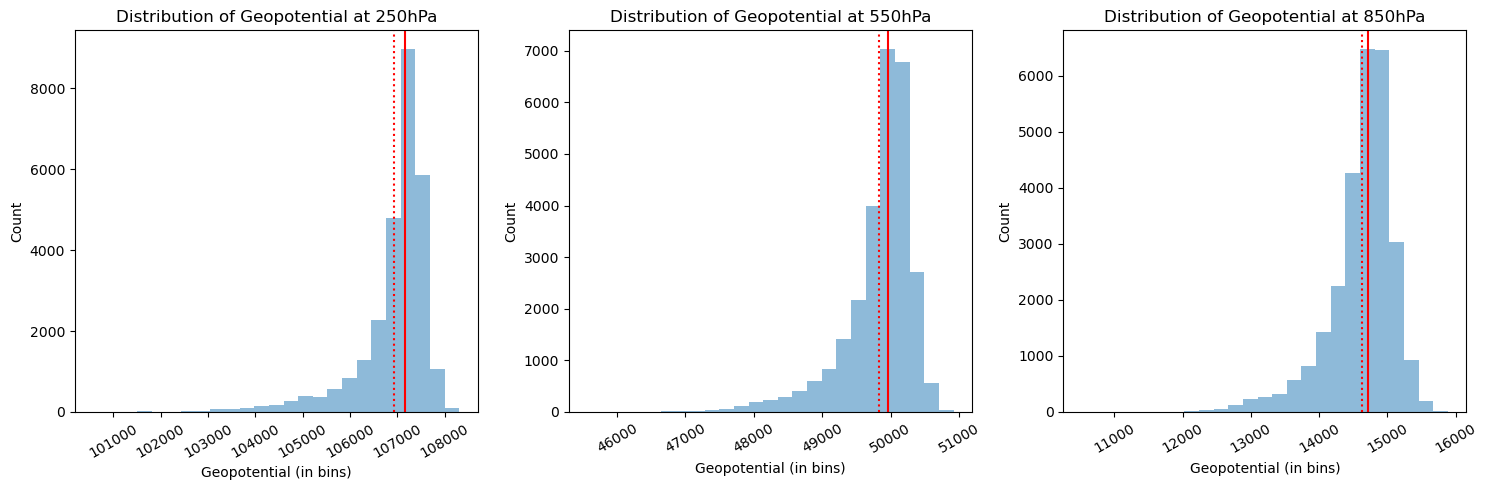

In [57]:
# subplots for geopotential columns
plt.subplots(1, 3, figsize=(15,5))

plt.subplot(1, 3, 1)
plt.hist(eda_df['geo_250'], bins=25, alpha=0.5)
plt.title('Distribution of Geopotential at 250hPa')
plt.xlabel('Geopotential (in bins)')
plt.ylabel('Count')
plt.axvline(eda_df['geo_250'].mean(), linestyle=':', color='r', label='Mean')
plt.axvline(eda_df['geo_250'].median(), linestyle='-', color='r', label='Median')
plt.xticks(rotation=30)

plt.subplot(1, 3, 2)
plt.hist(eda_df['geo_550'], bins=25, alpha=0.5)
plt.title('Distribution of Geopotential at 550hPa')
plt.xlabel('Geopotential (in bins)')
plt.ylabel('Count')
plt.axvline(eda_df['geo_550'].mean(), linestyle=':', color='r', label='Mean')
plt.axvline(eda_df['geo_550'].median(), linestyle='-', color='r', label='Median')
plt.xticks(rotation=30)

plt.subplot(1, 3, 3)
plt.hist(eda_df['geo_850'], bins=25, alpha=0.5)
plt.title('Distribution of Geopotential at 850hPa')
plt.xlabel('Geopotential (in bins)')
plt.ylabel('Count')
plt.axvline(eda_df['geo_850'].mean(), linestyle=':', color='r', label='Mean')
plt.axvline(eda_df['geo_850'].median(), linestyle='-', color='r', label='Median')
plt.xticks(rotation=30)

plt.tight_layout()

plt.show()

*Note: Geopotential measured in $m^2s^{-2}$.*

The distributions have a distinct left skew. This might be due to Geopotential at each pressure level dropping as as storm gets more severe. Let's take a closer look at the 850hPa distribution.

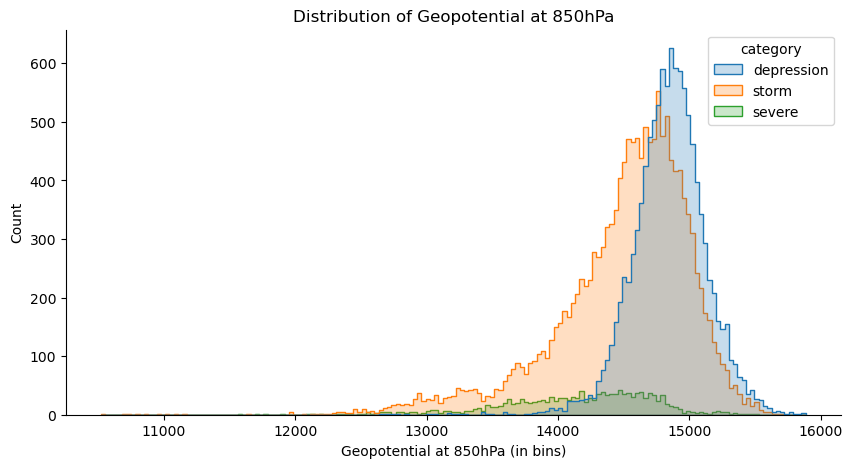

In [58]:
plt.figure(figsize=(10,5))

sns.histplot(data=eda_df, x='geo_850', hue='category', element='step')
plt.title('Distribution of Geopotential at 850hPa')
plt.xlabel('Geopotential at 850hPa (in bins)')

sns.despine()
plt.show()

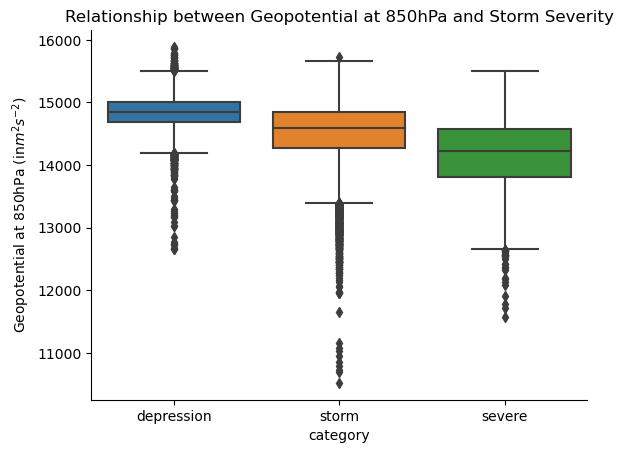

In [59]:
plt.figure()

sns.boxplot(data=eda_df, x='category', y='geo_850')
plt.title('Relationship between Geopotential at 850hPa and Storm Severity')
plt.ylabel('Geopotential at 850hPa (in$m^2s^{-2}$)')

sns.despine()
plt.show()

Our assumption about the reason for right skew appears to be right. We can see that geopotential tends to drop with the severity of the storm. 

#### `u_wind_250`, `u_wind_550`, and `u_wind_850` columns

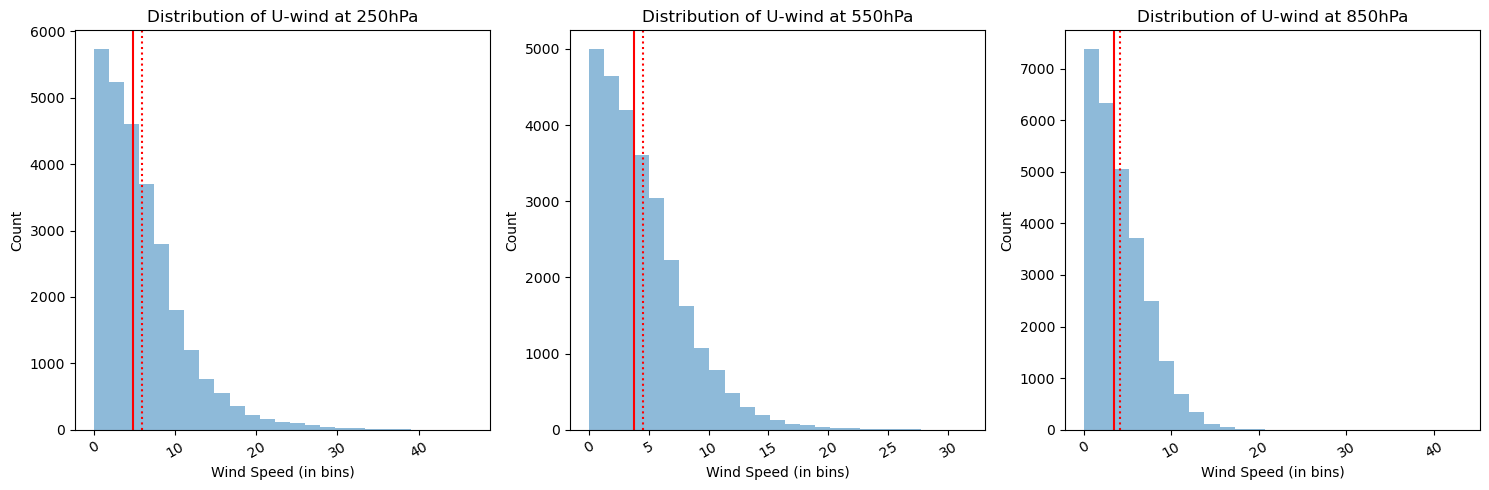

In [60]:
# subplots for u-wind columns
plt.subplots(1, 3, figsize=(15,5))

plt.subplot(1, 3, 1)
plt.hist(eda_df['u_wind_250'], bins=25, alpha=0.5)
plt.title('Distribution of U-wind at 250hPa')
plt.xlabel('Wind Speed (in bins)')
plt.ylabel('Count')
plt.axvline(eda_df['u_wind_250'].mean(), linestyle=':', color='r', label='Mean')
plt.axvline(eda_df['u_wind_250'].median(), linestyle='-', color='r', label='Median')
plt.xticks(rotation=30)

plt.subplot(1, 3, 2)
plt.hist(eda_df['u_wind_550'], bins=25, alpha=0.5)
plt.title('Distribution of U-wind at 550hPa')
plt.xlabel('Wind Speed (in bins)')
plt.ylabel('Count')
plt.axvline(eda_df['u_wind_550'].mean(), linestyle=':', color='r', label='Mean')
plt.axvline(eda_df['u_wind_550'].median(), linestyle='-', color='r', label='Median')
plt.xticks(rotation=30)

plt.subplot(1, 3, 3)
plt.hist(eda_df['u_wind_850'], bins=25, alpha=0.5)
plt.title('Distribution of U-wind at 850hPa')
plt.xlabel('Wind Speed (in bins)')
plt.ylabel('Count')
plt.axvline(eda_df['u_wind_850'].mean(), linestyle=':', color='r', label='Mean')
plt.axvline(eda_df['u_wind_850'].median(), linestyle='-', color='r', label='Median')
plt.xticks(rotation=30)

plt.tight_layout()

plt.show()

*Note: Wind speeds are measured in knots.*<br>

There is an obvious right skew to the distribution. That makes sense as higher wind speeds occur in more severe storms which are rare.

#### `u_dir_250`, `u_dir_550`, and `u_dir_850` columns

*Note: 1 denotes Eastward wind and 0 denotes Westward wind*

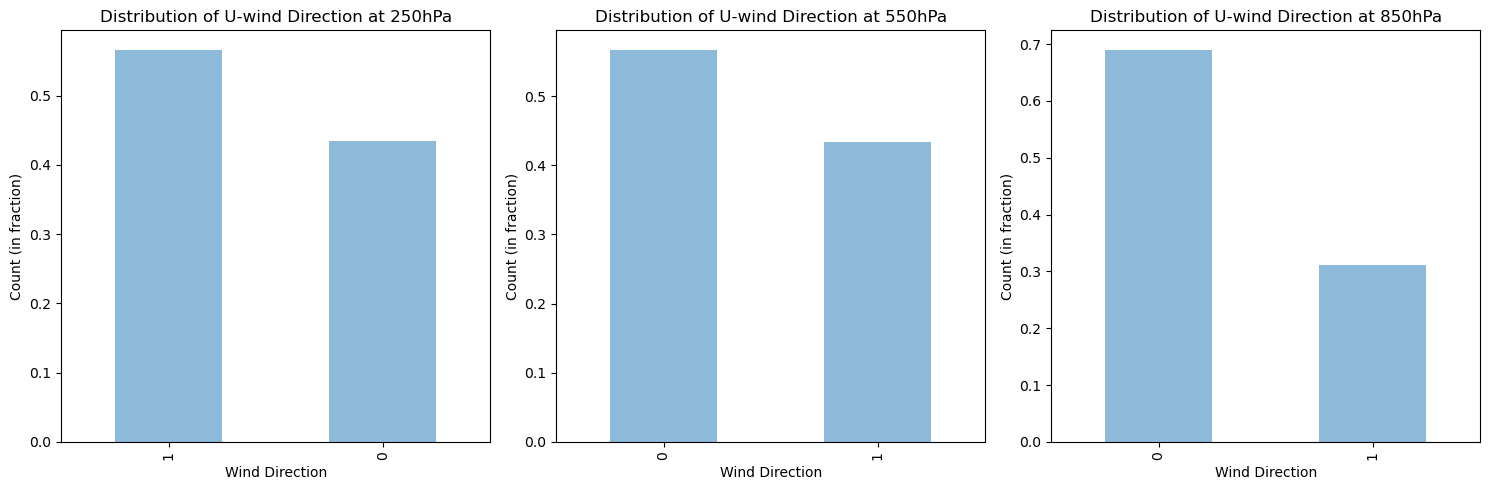

In [61]:
# subplots for u-wind columns
plt.subplots(1, 3, figsize=(15,5))

plt.subplot(1, 3, 1)
eda_df['u_dir_250'].value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.title('Distribution of U-wind Direction at 250hPa')
plt.xlabel('Wind Direction')
plt.ylabel('Count (in fraction)')


plt.subplot(1, 3, 2)
eda_df['u_dir_550'].value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.title('Distribution of U-wind Direction at 550hPa')
plt.xlabel('Wind Direction')
plt.ylabel('Count (in fraction)')

plt.subplot(1, 3, 3)
eda_df['u_dir_850'].value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.title('Distribution of U-wind Direction at 850hPa')
plt.xlabel('Wind Direction')
plt.ylabel('Count (in fraction)')

plt.tight_layout()

plt.show()

Higher fraction of westward winds expected for 550hPa and 850hPa levels as the storms overall move from east to west for the majority of their lifecycle. The higher fraction of Eastward wind at hegiht of 250 hPa might be due to the presence of unrelated tradewinds at that altitude. 

#### `v_wind_250`,`v_wind_550`, and `v_wind_850` columns

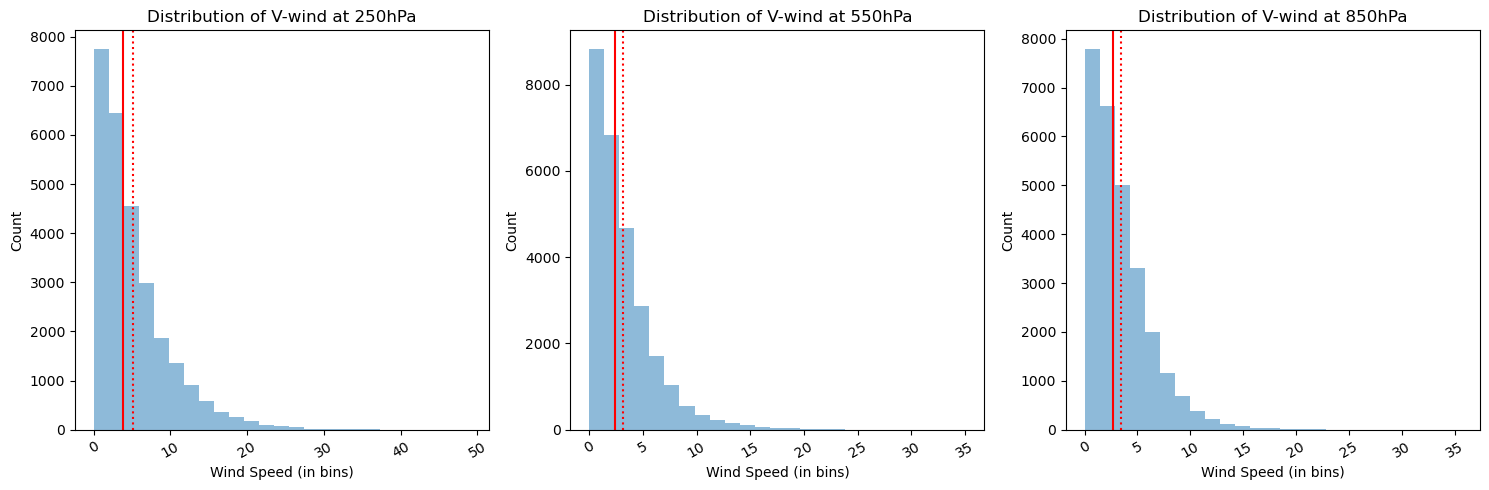

In [62]:
# subplots for v-wind columns
plt.subplots(1, 3, figsize=(15,5))

plt.subplot(1, 3, 1)
plt.hist(eda_df['v_wind_250'], bins=25, alpha=0.5)
plt.title('Distribution of V-wind at 250hPa')
plt.xlabel('Wind Speed (in bins)')
plt.ylabel('Count')
plt.axvline(eda_df['v_wind_250'].mean(), linestyle=':', color='r', label='Mean')
plt.axvline(eda_df['v_wind_250'].median(), linestyle='-', color='r', label='Median')
plt.xticks(rotation=30)

plt.subplot(1, 3, 2)
plt.hist(eda_df['v_wind_550'], bins=25, alpha=0.5)
plt.title('Distribution of V-wind at 550hPa')
plt.xlabel('Wind Speed (in bins)')
plt.ylabel('Count')
plt.axvline(eda_df['v_wind_550'].mean(), linestyle=':', color='r', label='Mean')
plt.axvline(eda_df['v_wind_550'].median(), linestyle='-', color='r', label='Median')
plt.xticks(rotation=30)

plt.subplot(1, 3, 3)
plt.hist(eda_df['v_wind_850'], bins=25, alpha=0.5)
plt.title('Distribution of V-wind at 850hPa')
plt.xlabel('Wind Speed (in bins)')
plt.ylabel('Count')
plt.axvline(eda_df['v_wind_850'].mean(), linestyle=':', color='r', label='Mean')
plt.axvline(eda_df['v_wind_850'].median(), linestyle='-', color='r', label='Median')
plt.xticks(rotation=30)

plt.tight_layout()

plt.show()

Similar to u_wind, the distribution has a distinct right skew due to higher wind speeds being rarer. 

#### `v_dir_250`, `v_dir_550`, and `v_dir_850` columns

*Note: 1 denotes Northward wind and 0 denotes Southward wind*

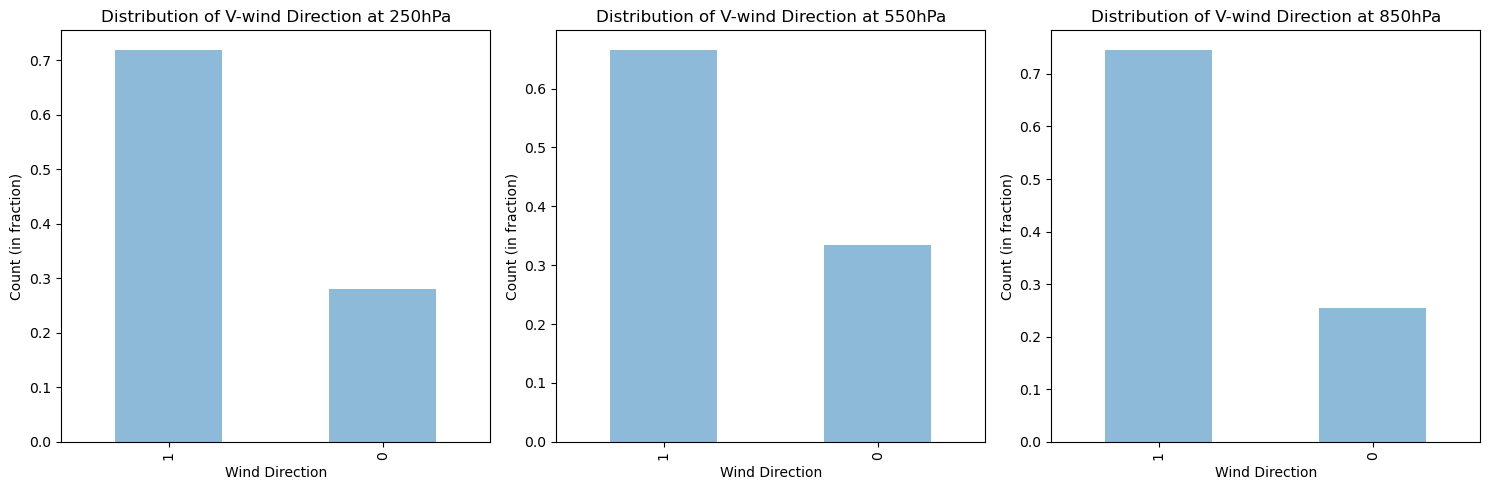

In [63]:
# subplots for u-wind columns
plt.subplots(1, 3, figsize=(15,5))

plt.subplot(1, 3, 1)
eda_df['v_dir_250'].value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.title('Distribution of V-wind Direction at 250hPa')
plt.xlabel('Wind Direction')
plt.ylabel('Count (in fraction)')


plt.subplot(1, 3, 2)
eda_df['v_dir_550'].value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.title('Distribution of V-wind Direction at 550hPa')
plt.xlabel('Wind Direction')
plt.ylabel('Count (in fraction)')

plt.subplot(1, 3, 3)
eda_df['v_dir_850'].value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.title('Distribution of V-wind Direction at 850hPa')
plt.xlabel('Wind Direction')
plt.ylabel('Count (in fraction)')

plt.tight_layout()

plt.show()

The fraction of winds moving nmorthward is higher. This is explained by storm paths which rarely tend to move towards the south. The presence of any southward component at all is probably because of the rotsational nature of winds in a Tropical storm.

#### `intensity_delta` column

In [84]:
eda_df['intensity_delta'].value_counts(normalize=True)

0.0    0.690313
1.0    0.309687
Name: intensity_delta, dtype: float64

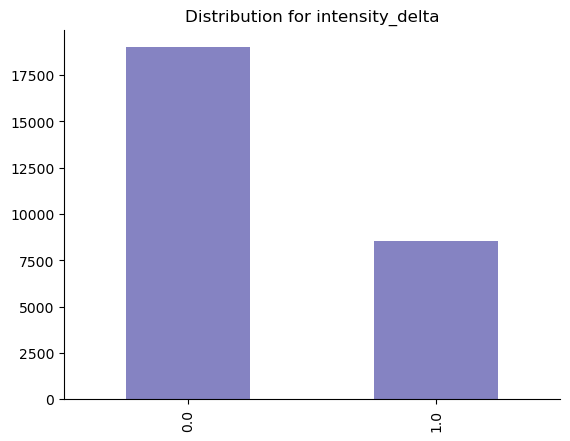

In [64]:
dist_plot(eda_df, 'intensity_delta', 'bar')

Increases in intensity are rare. This is for the better as it means storms in general are less likely to increase in severity.

### Finding Relationships and Correlation between Variables

Even though there are a lot of columns, let's look at a pairplot to see if we can identify any trends and relationships. I will drop some columns that aren't useful here. To try and maintain some interpretability, I will only use geopotential and u,v wind values for 850 hPa pressure level.  

In [65]:
eda_df.columns

Index(['time', 'lat', 'lon', 'dist2land', 'wind_surface', 'pressure_surface',
       'category', 'storm_speed', 'storm_dir', 'geo_250', 'u_wind_250',
       'u_dir_250', 'v_wind_250', 'v_dir_250', 'geo_550', 'u_wind_550',
       'u_dir_550', 'v_wind_550', 'v_dir_550', 'geo_850', 'u_wind_850',
       'u_dir_850', 'v_wind_850', 'v_dir_850', 'wind_lag', 'intensity_delta'],
      dtype='object')

<Figure size 1500x1500 with 0 Axes>

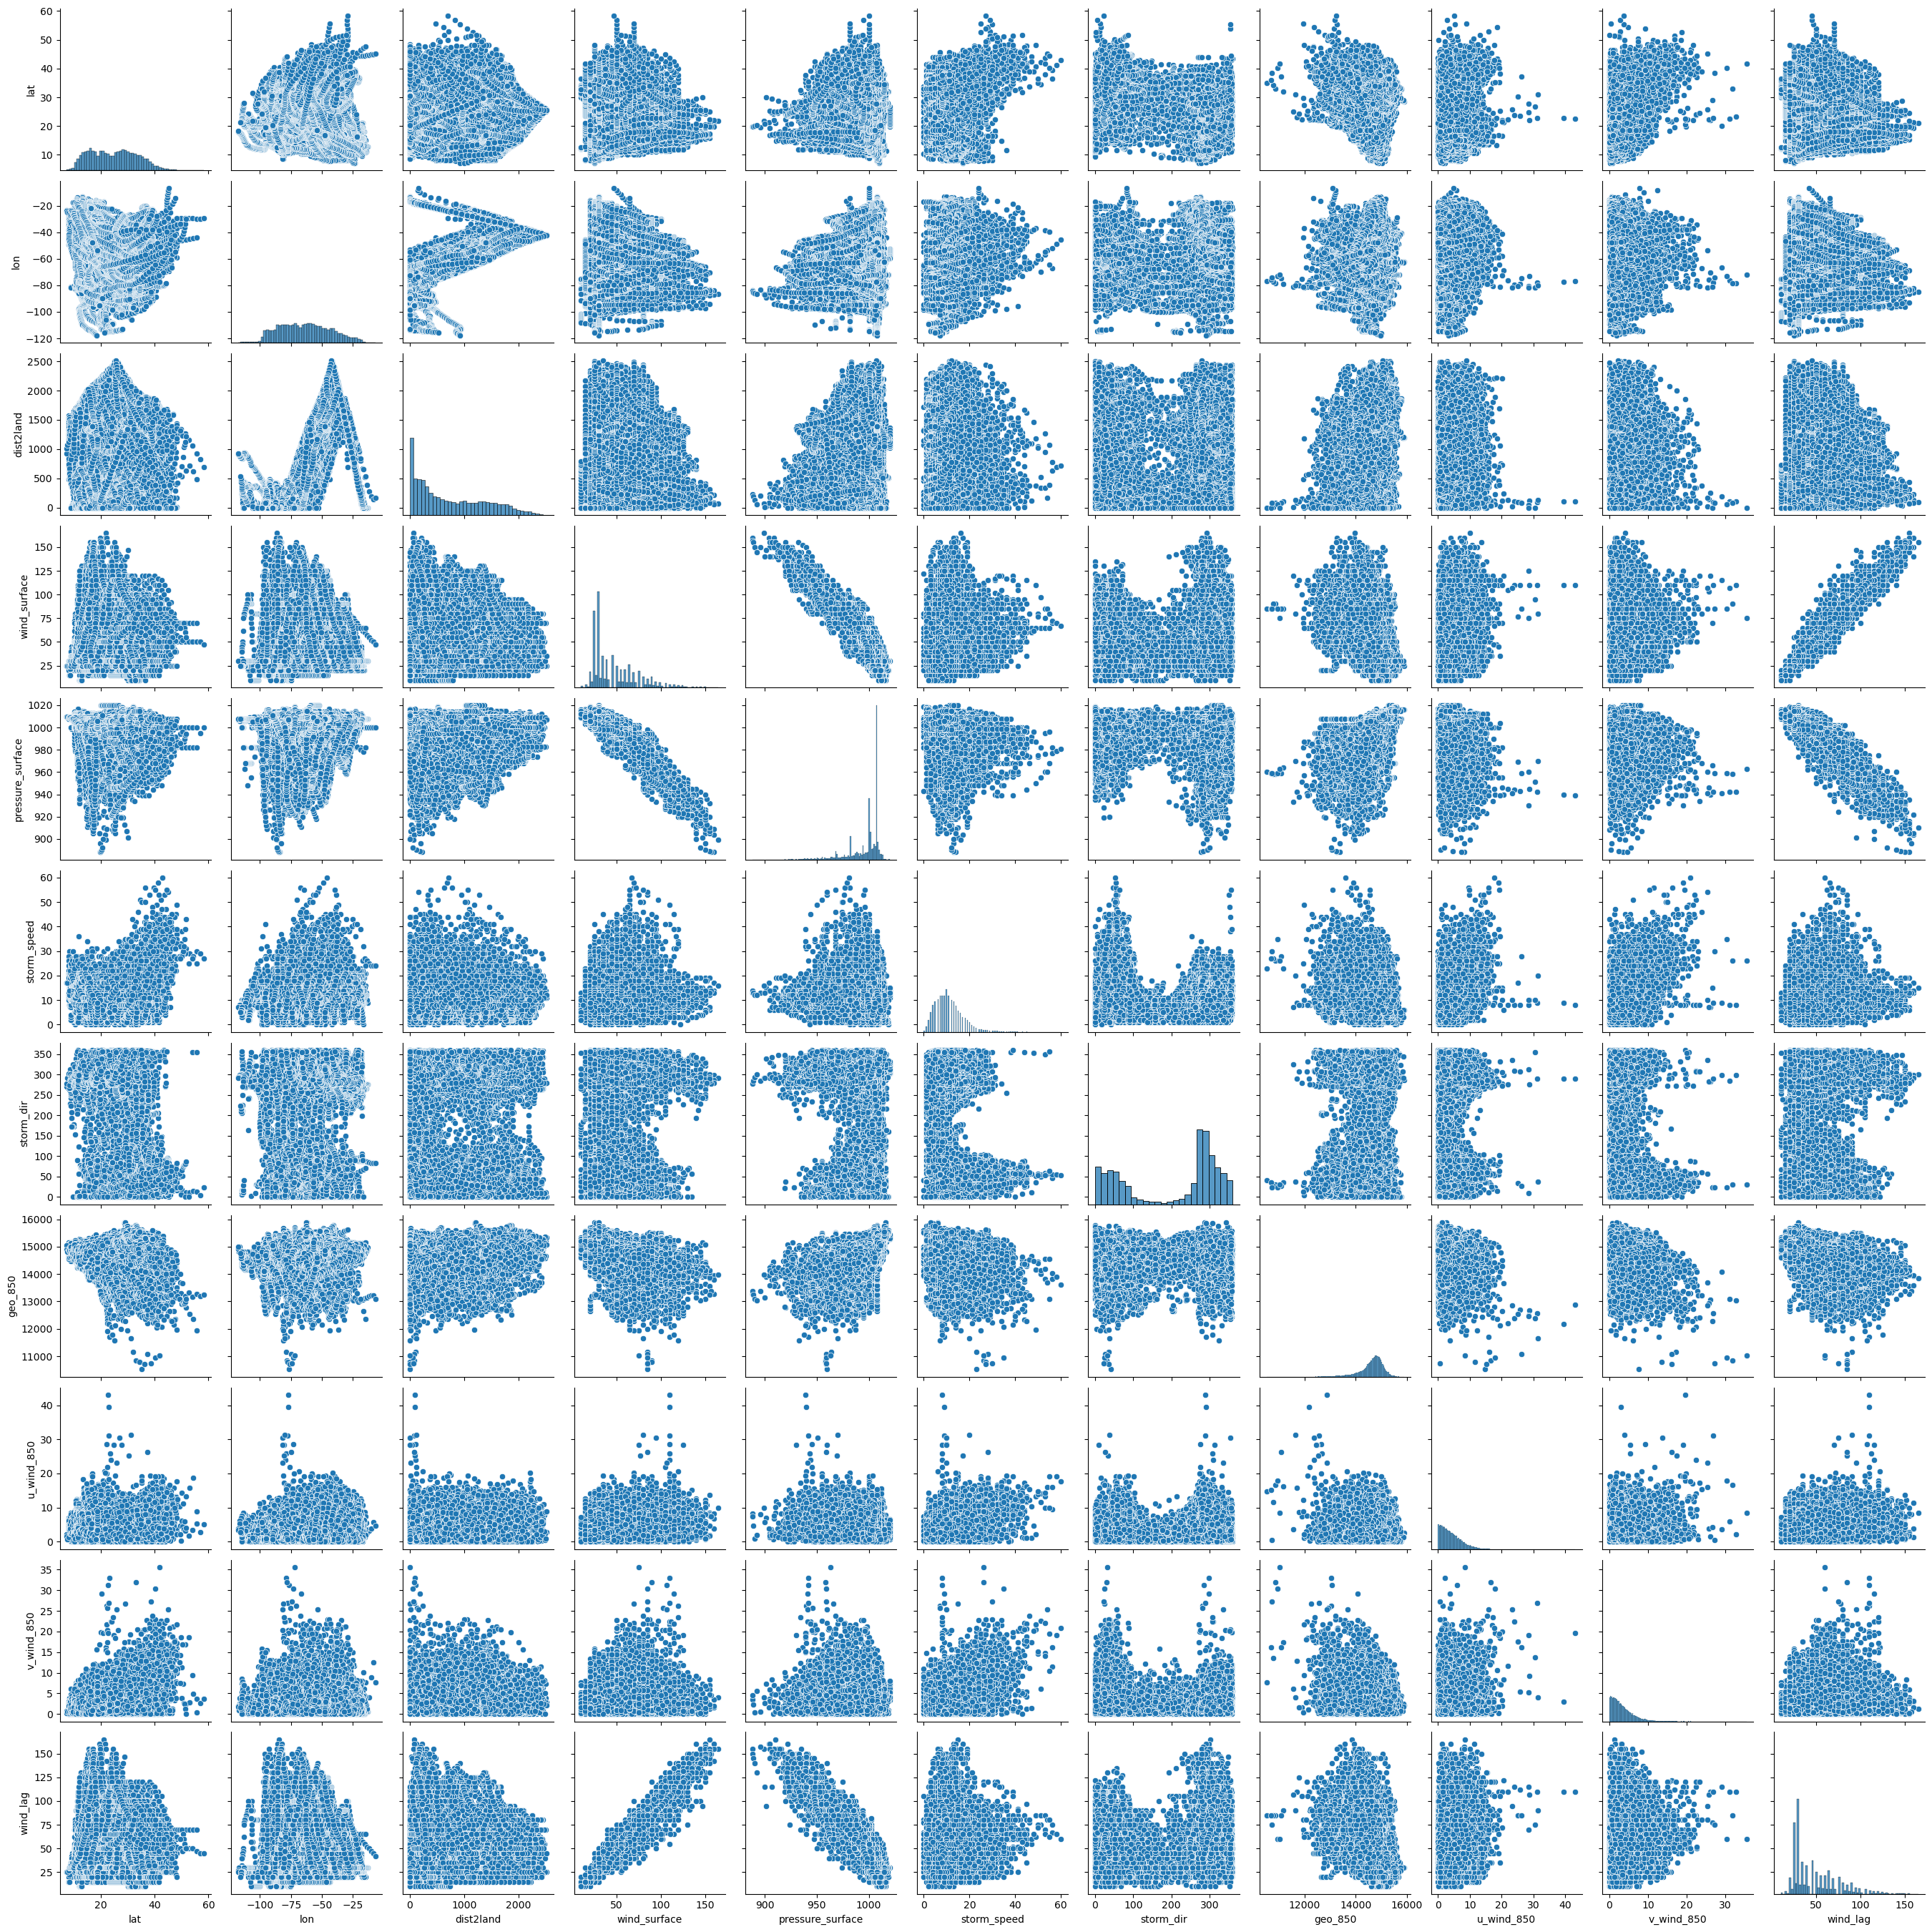

In [66]:
plt.figure(figsize=(15,15))
sns.pairplot(eda_df.drop(columns=['time', 'geo_550', 'u_wind_550', 'v_wind_550', 'u_dir_550', 'v_dir_550',
                                  'geo_250', 'u_wind_250', 'v_wind_250', 'u_dir_250', 'v_dir_250',
                                  'intensity_delta', 'u_dir_850', 'v_dir_850']))
sns.despine()
plt.show()

There seem to be a some interesting relationships here. Let's check for correlations in the variables by plotting the correlation matrix on a heatmap.


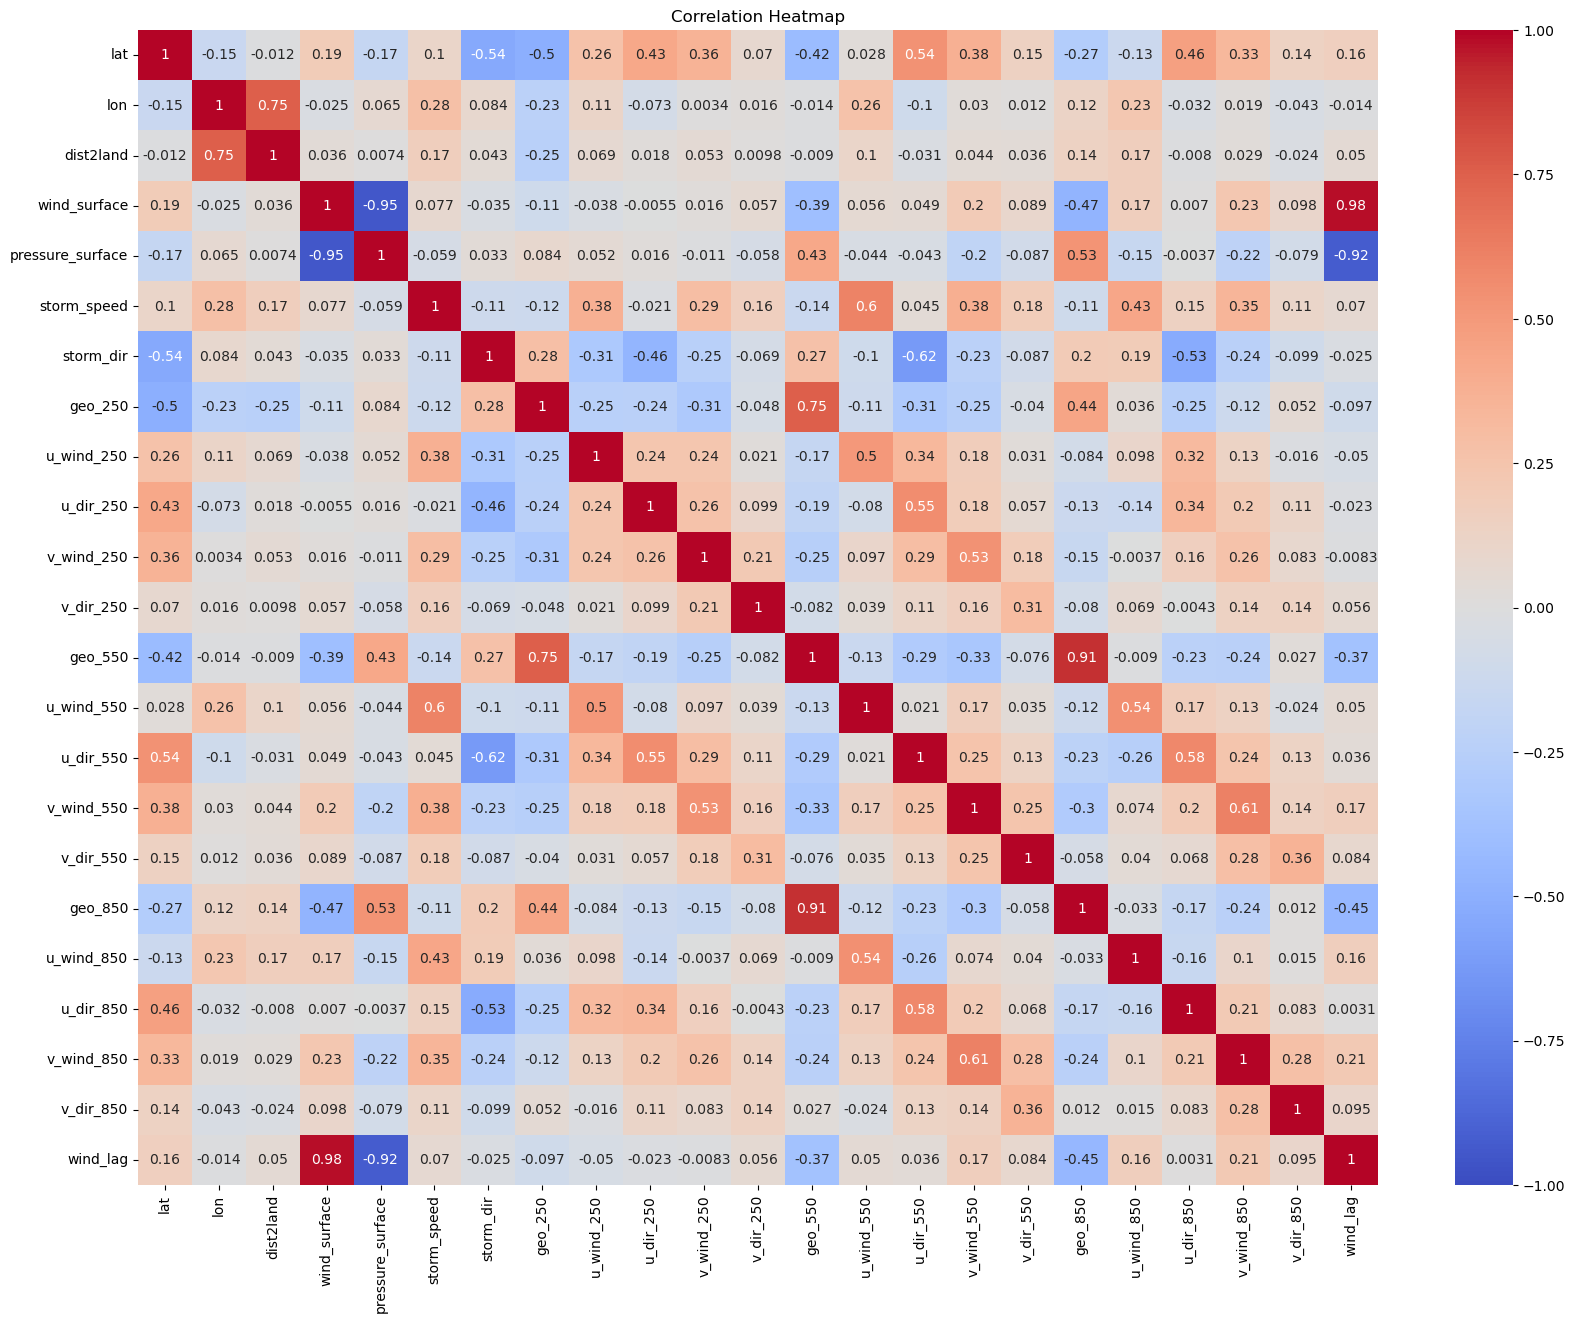

In [67]:
# correlation heatmap after dropping target variable 'intensity_delta'
plt.figure(figsize=(20,15))

sns.heatmap(eda_df.drop(columns='intensity_delta').corr(), cmap='coolwarm', vmax=1, vmin=-1, annot=True)
plt.title('Correlation Heatmap')

plt.show()

There are a few standout relationships here. Let's explore them individually.


*Note: Geopotential and u,v winds will have a certain level of correlation between nearby pressure levels (850hPa and 550hPa, and 250hPa and 550hPa). Therefore, it would not be wise to include all three during modelling.*

*Note: `wind_surface` and `wind_lag` have a near perfect correlation. This is obvious since one was used to derive the other. We won't use `wind_lag` for modelling so it will not be an issue.*

#### `geo_850` and `pressure_surface`

There seems to be a significant relationship between `geo_850` and `pressure_surface`. This is to be expected, as pressure level of 850hPa is close to the surface pressure. This is particularly applicable to tropical storms and depressions as surface pressure is lower for these weather phenomenon.

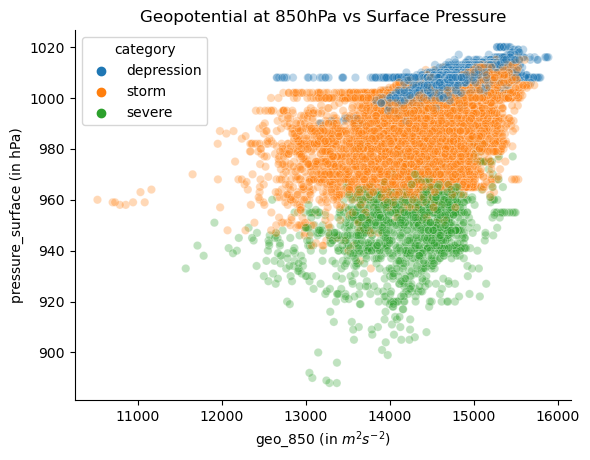

In [68]:
# scatter plot geo_850 vs pressure_surface
plt.figure()

sns.scatterplot(data=eda_df, x='geo_850', y='pressure_surface', alpha=0.3, hue='category')
plt.title('Geopotential at 850hPa vs Surface Pressure')
plt.xlabel('geo_850 (in $m^2s^{-2}$)')
plt.ylabel('pressure_surface (in hPa)')

sns.despine()
plt.show()

As we can see, there seems to be a positive relationship between the two variables. Moreover, the severity of the storm increases with lower surface pressure and lower geopotential at 850hPa. Let's re-check for significance with .corr().

In [69]:
# pearson correlation
eda_df['geo_850'].corr(eda_df['pressure_surface'])

0.5307737699351078

**There is a mild/strong relationship between the two variables.** This is something to keep in mind while modelling. The relationship isn't strong enough to discard the variable out of hand however.

#### `wind_surface` and `pressure_surface`

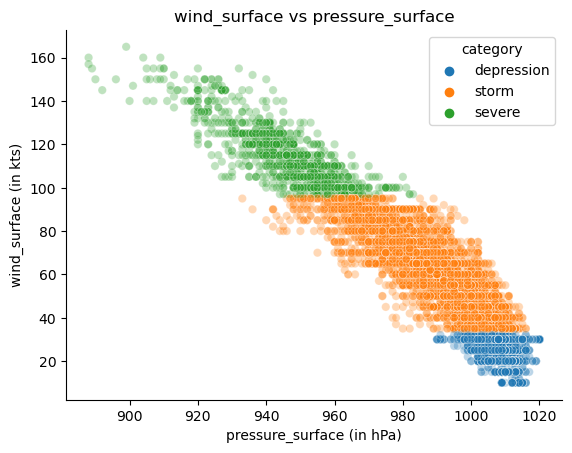

In [70]:
# scatter plot wind_surface vs pressure_surface
plt.figure()

sns.scatterplot(data=eda_df, x='pressure_surface', y='wind_surface', alpha=0.3, hue='category')
plt.title('wind_surface vs pressure_surface')
plt.xlabel('pressure_surface (in hPa)')
plt.ylabel('wind_surface (in kts)')

sns.despine()
plt.show()

Surface wind speed tends to increase almost linearly with a decrease in surface pressure. This is a hallmark characteristic of Tropical sotrms. The low pressure causes wind speeds to increase. Moreover, we can see a very neat distribution of storm severity with a fall in pressure. Lower the pressure, more severe the storm. 

In [71]:
eda_df['wind_surface'].corr(eda_df['pressure_surface'])

-0.9475630908626872

**There is an almost prefect correlation between the variables.** When we model we won't use these variables together. However, since the relatiuonship isn't perfect, we will have to figure out which variable is more important in predicting our target variable. 

#### `u_dir_550` and `storm_dir`

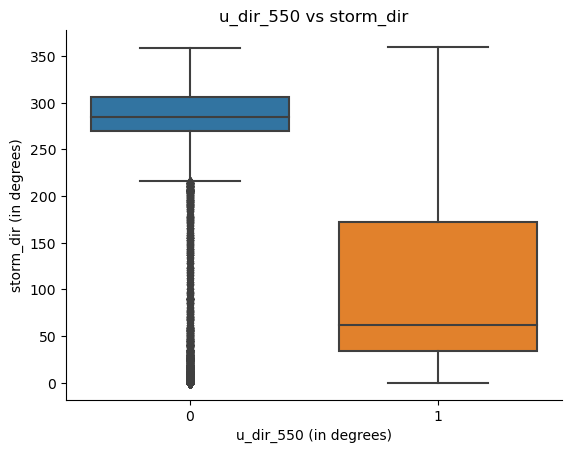

In [72]:
# scatter plot u_wind_550 vs storm_dir
plt.figure()

sns.boxplot(data=eda_df, x='u_dir_550', y='storm_dir')
plt.title('u_dir_550 vs storm_dir')
plt.xlabel('u_dir_550 (in degrees)')
plt.ylabel('storm_dir (in degrees)')

sns.despine()
plt.show()

In [73]:
eda_df['u_dir_550'].corr(eda_df['storm_dir'])

-0.6214449634090513

No major surprises here, Eastward u-wind corresponds to storms moving towards the east. 

**The correlation is quite strong.**

#### `u_wind_550` and `storm_speed`

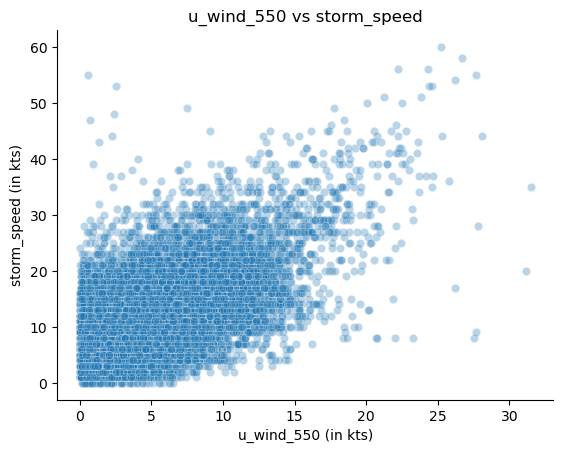

In [74]:
# scatter plot wind_surface vs pressure_surface
plt.figure()

sns.scatterplot(data=eda_df, x='u_wind_550', y='storm_speed', alpha=0.3)
plt.title('u_wind_550 vs storm_speed')
plt.xlabel('u_wind_550 (in kts)')
plt.ylabel('storm_speed (in kts)')

sns.despine()
plt.show()

In [75]:
eda_df['u_wind_550'].corr(eda_df['storm_speed'])

0.6045166023586857

**There is a relatively strong correlation between the variables.** 

Storm speed increases with an increase in u-wind speed. 

## Summary of Findings

- The distribution for Latitude of storms shows distinct bimodality hinting at difference in origin and path length.
- A large number of storms go on to make landfall.
- Only around 5% of storms achieve super high wind speeds but these storms cause most of the damage.
- Geopotential tends to be lower for more severe storms.
- Moderate correlation between Geopotential at 850hPa and surface pressure.
- Near perfect correlation between surface winds and surface pressure. As lower the pressure, the more severe the storm is.
- Moderate to strong correlation between u_wind_550 and storm speed. Higher the east-west wind speed the faster the translational movement of the storm.

### Writing to .csv

I will write our resultant dataframe to a .csv for use with the Modelling Notebook.

In [270]:
eda_df.to_csv('data/model_data.csv')